# Pegasus training

Inspect the loss values during the training

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
#log = "pegasus_logs/trainer_state_30000.json" # first attempt, hard pipeline
#log = "pegasus_logs/trainer_state_30000_d2.json" # first attempt, dropout 0.2, hard pipeline
#log = "pegasus_logs/trainer_state_30000_freeze_embeddings.json" # freeze input emb, hard pipeline
#log = "pegasus_logs/trainer_state_50000_freeze_encoder.json" # freeze encoder, hard pipeline

log = "pegasus_logs/trainer_state_8920_filter.json" # smaller set, easy pipeline

#log = "pegasus_logs/trainer_state_8920_filter_d2.json" # smaller set, dropout 0.2, easy pipeline
#log = "pegasus_logs/trainer_state_8920_filter_freeze_emb.json" # smaller set, freeze input/output emb, easy pipeline
#log = "pegasus_logs/trainer_state_8920_filter_hard.json" # smaller set, hard pipeline
#log = "pegasus_logs/trainer_state_17840_filter_hard.json" # smaller set, hard pipeline

#log = "pegasus_logs/trainer_state_6000_transcripts.json" # different set, from transcripts
#log = "pegasus_logs/trainer_state_18000_transcripts.json" # different set, from transcripts

initial_rouge = []
initial_rouge = [0.15853358014823346, 0.02406459131652215, 0.13126128597750472] # 8920 filter
#initial_rouge = [0.17712288499281914, 0.02359281958865836, 0.14236234638629622] # hard
#initial_rouge = [0.16591377169054183, 0.023302466681060455, 0.13553571942471132] # transcripts

with open(log) as f:
    d = json.load(f)

In [10]:
total_steps = d["max_steps"]
steps = d["global_step"]

total_epochs = d["num_train_epochs"]
epochs = d["epoch"]

print(f"Steps completed: {steps}/{total_steps} | {steps / total_steps * 100 :.2f}%")
print(f"Epochs completed: {epochs:.2f}/{total_epochs} | {epochs / total_epochs * 100 :.2f}%")

Steps completed: 8920/8920 | 100.00%
Epochs completed: 10.00/10 | 100.00%


In [11]:
loss = pd.DataFrame(columns=["epoch", "loss", "eval_loss"]).set_index("epoch")
rouge = pd.DataFrame(columns=["epoch", "r1", "r2", "rl"]).set_index("epoch")
history = d["log_history"]

if len(initial_rouge) != 0:
    rouge.loc[0] = initial_rouge
    
for i in history:
    if "loss" in i:
        loss.loc[i["epoch"], "loss"] = i["loss"]
    if "eval_loss" in i:
        loss.loc[i["epoch"], "eval_loss"] = i["eval_loss"]
    if "eval_rouge-1" in i:
        rouge.loc[i["epoch"], "r1"] = i["eval_rouge-1"]
    if "eval_rouge-2" in i:
        rouge.loc[i["epoch"], "r2"] = i["eval_rouge-2"]
    if "eval_rouge-l" in i:
        rouge.loc[i["epoch"], "rl"] = i["eval_rouge-l"]

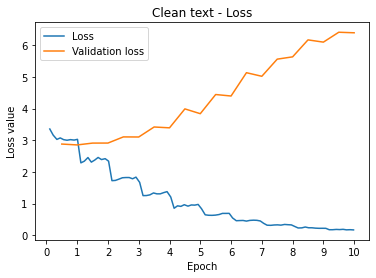

In [14]:
#loss.plot()
plt.plot(loss["loss"].dropna(), label="Loss")
plt.plot(loss["eval_loss"].dropna(), label="Validation loss")

#plt.title("ASR transcripts - Loss")
#plt.title("ASR-like transcripts - Loss")
plt.title("Clean text - Loss")

plt.xlabel("Epoch")
plt.ylabel("Loss value")

#plt.xticks([i for i in range(31) if i % 2 == 0])
#plt.xticks([i for i in range(21)])
plt.xticks([i for i in range(11)])
plt.legend()

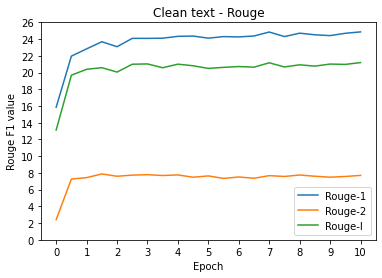

In [15]:
# 0 values are due to errors in the metric function. 
# This happens when pegasus generates only dots.
# The latest models fixed this
(rouge[rouge["r1"]!=0] * 100).plot()

#plt.title("ASR transcript - Rouge")
#plt.title("ASR-like transcript - Rouge")
plt.title("Clean text - Rouge")

plt.xlabel("Epoch")
plt.ylabel("Rouge F1 value")
plt.yticks([i*2 for i in range(14)])

#plt.xticks([i for i in range(31) if i % 2 == 0])
#plt.xticks([i for i in range(21)])
plt.xticks([i for i in range(11)])
plt.legend(["Rouge-1", "Rouge-2", "Rouge-l"])
plt.show()

In [7]:
rouge[rouge["r1"]!=0].mean()

r1    0.246490
r2    0.078222
rl    0.209179
dtype: float64

In [11]:
rouge[rouge.index < 40].max()

r1    0.255726
r2    0.084522
rl    0.216499
dtype: float64

In [5]:
rouge[rouge["r2"] >= 0.083]

,r1,r2,rl
epoch,,,
5.0,0.251003,0.083397,0.215222
10.0,0.249249,0.084522,0.214878
22.0,0.250168,0.083071,0.212205
23.5,0.254578,0.083161,0.216499


In [19]:
#rouge.loc[5.04] # hard pipeline
rouge.loc[3] # easy pipeline
rouge.loc[5] # transcripts

r1    0.251003
r2    0.083397
rl    0.215222
Name: 5.0, dtype: float64

In [16]:
for i in rouge.index:
    print(i)

0.5
1.0
1.5
2.0
2.5
3.0
3.5
4.0
4.5
5.0
5.5
6.0
6.5
7.0
7.5
8.0
8.5
9.0
9.5
10.0


In [14]:
rouge["r2"].argmax()

20